# Import Packages

In [1]:
# sys
import os
from os.path import isfile
from inspect import CO_VARARGS
import warnings

warnings.filterwarnings("ignore")  # ignoring warnings

# SKLearn
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from sklearn import metrics

#NLTK & NLP
import nltk
from urllib import request
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
from string import punctuation
from nltk.stem import PorterStemmer


# Other Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from pandas_profiling import ProfileReport
from os import listdir, walk
from os.path import isfile, join
import re
import string
from itertools import groupby
import seaborn as sns
import email #library for managing email messages

In [3]:

# to count letters and punctuation in a string
count = lambda l1, l2: sum([1 for x in l1 if x in l2])


def replace_multiple(mainString, toBeReplaces, newString):
    """
    Replace a set of multiple sub strings with a new string in main string.
    """
    # Iterate over the strings to be replaced
    for elem in toBeReplaces:
        # Check if string is in the main string
        if elem in mainString:
            # Replace the string
            mainString = mainString.replace(elem, newString)

    return mainString


def grid_search(X, y, model, grid, score, cv):
    # define search
    search_grid_search_measure = GridSearchCV(
        model, grid, scoring=score, cv=cv, n_jobs=nj, verbose=1
    )

    labels_true = y.to_numpy()
    labels_true = np.squeeze(np.asarray(np.transpose(labels_true)))

    # perform the search
    results_grid_search_measure = search_grid_search_measure.fit(X, labels_true)

    return results_grid_search_measure

# Data Engineering

In [4]:
from os import listdir, getcwd, chdir
from os.path import isfile, join, dirname, realpath
import pandas as pd

import email
import email.parser
from email.parser import Parser

def get_cwd():
    try:
        chdir(dirname(realpath(__file__)))
    except:
        chdir('/Users/boyun/Desktop/SMU/DS7333-QuantifyingTheWorld/MSDS-7333-QTW/')

    active_dir = getcwd()
       
    return active_dir

def main():
    
    get_cwd()
    
    directories = [
            'easy_ham',
            'easy_ham_2',
            'hard_ham',
            'spam',
            'spam_2'
        ]
    
    res_frame = pd.DataFrame()

    # *dc - Added to keep a collection of email text
    emails = []

    emails_body = []
        
    for d in directories:
        mypath = getcwd() + '/data/' + d + '/'
        onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    
        try:
            onlyfiles.remove('.DS_Store')
        except:
            pass
        
        for file in onlyfiles:
            with open(mypath + file, encoding='latin1') as f:
                lines = f.readlines()
                f.seek(0) # reset file pointer to beginning
                body = f.read()
                f.close()
            
            # with open(mypath + file, encoding='latin1') as f:
            #     body = f.read()
            #     f.close()
                
            msg = email.message_from_string(str(body))
            tmpStr = ''
            
            if msg.is_multipart():
                for payload in msg.get_payload():
                    #tmp.append(str(payload.get_payload()))
                    
                    tmpStr = ' '.join(str(payload.get_payload()))
                emails_body.append(tmpStr)
            else:
                emails_body.append(str(msg.get_payload()))
                
            in_reply_count = 0
            sub_line_all_caps = 0
            attachments = 0
            subject_line = []
            n_lines = 0
            blank_lines = []
            
            for line in lines:

                n_lines += 1
                if "Subject: Re: " in line:
                   in_reply_count += 1
                if "Subject: " in line:
                   s_line = line.strip().replace('Subject: ','')
                   s_line = ''.join(e for e in s_line if e.isalnum())
                   num_upper = sum(1 for c in s_line if c.isupper())
                   ttl_chars = len(s_line)
                   if num_upper == ttl_chars:
                       sub_line_all_caps += 1
                   subject_line.append(s_line)
                if "content-type: multipart" in line.lower():
                   attachments += 1
                if line == "\n":
                   blank_lines.append(n_lines)
        
            temp_frame = pd.DataFrame({
                        'directory':d,    
                        'filename':file,
                        'is_spam':['Y' if 'spam' in d else 'N'],
                        'in_reply': ['Y' if in_reply_count > 0 else 'N'], 
                        'subj_caps': ['Y' if sub_line_all_caps > 0 else 'N'], 
                        'attachments': ['Y' if attachments > 0 else 'N'],
                        ## *dc+3 
                        #'body_lines': n_lines - min(blank_lines)
                        'body_lines': [0 if len(blank_lines) == 0 else min(blank_lines)]
                        }, index=[0])
           
            res_frame = res_frame.append(temp_frame, ignore_index=True)

            ## *dc+2
            # append body of email to collection
            text = ' '.join(lines)
            emails.append(text)
            
    #res_frame.to_csv('output_file.csv', index=False)
    
    ## *dc - add emails
    return res_frame, emails, emails_body

## *dc - Working from a notebook instead of py file.
df, emails, emails_body = main()


In [5]:
df

,directory,filename,is_spam,in_reply,subj_caps,attachments,body_lines
0,easy_ham,2170.78c282a5e417d6d231dc75aa8588ebb7,N,N,N,N,24
1,easy_ham,0461.7609029b07acf65f40bd93882aa35887,N,N,N,N,51
2,easy_ham,00769.25bf9a767b5db0ed93f03c1637281663,N,Y,N,N,43
3,easy_ham,01074.8590d61ac0aeeadb58dc2f2ba776c406,N,N,N,N,51
4,easy_ham,02479.14365bcad3a60fcf24c5c1813f6291fb,N,Y,N,N,48
...,...,...,...,...,...,...,...
9348,spam_2,01311.43bfe86df65d53c5f7ca2365dc12582b,Y,N,N,N,25
9349,spam_2,00851.dc5452f80ba0bb8481dfc48f70380c4d,Y,N,N,N,47
9350,spam_2,01328.b23902de23cb3ca1f3334517282372b2,Y,N,N,N,54
9351,spam_2,01244.9ef966101737a6fc27d8965def288d70,Y,N,N,N,38


In [6]:
# Changing Y,N to 1 and 0
df = df.replace(['Y','N'],[1,0])
df

,directory,filename,is_spam,in_reply,subj_caps,attachments,body_lines
0,easy_ham,2170.78c282a5e417d6d231dc75aa8588ebb7,0,0,0,0,24
1,easy_ham,0461.7609029b07acf65f40bd93882aa35887,0,0,0,0,51
2,easy_ham,00769.25bf9a767b5db0ed93f03c1637281663,0,1,0,0,43
3,easy_ham,01074.8590d61ac0aeeadb58dc2f2ba776c406,0,0,0,0,51
4,easy_ham,02479.14365bcad3a60fcf24c5c1813f6291fb,0,1,0,0,48
...,...,...,...,...,...,...,...
9348,spam_2,01311.43bfe86df65d53c5f7ca2365dc12582b,1,0,0,0,25
9349,spam_2,00851.dc5452f80ba0bb8481dfc48f70380c4d,1,0,0,0,47
9350,spam_2,01328.b23902de23cb3ca1f3334517282372b2,1,0,0,0,54
9351,spam_2,01244.9ef966101737a6fc27d8965def288d70,1,0,0,0,38


## Data Pre-processing for emails

In [7]:
import nltk
import re 
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lowercase and remove special characters to form a normalized document
    doc = re.sub(r'[^a-zA-Z0-9\s]', ' ', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()

    # tokenize document
    tokens = nltk.word_tokenize(doc)
    
    # filter out stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Remove numbers
    filtered_tokens = [token for token in filtered_tokens if not token.isdigit()]

    # Remove short tokens
    filtered_tokens = [token for token in filtered_tokens if len(token) > 2]

    # stem tokens - Skipping for now
    #filtered_tokens = [stemming.stem(token) for token in filtered_tokens]

    # re-create a normalized document
    doc = ' '.join(filtered_tokens)
    return doc

normalize_text = np.vectorize(normalize_document)
norm_text = normalize_text(emails)

print(type(norm_text),len(norm_text))

<class 'numpy.ndarray'> 9353


In [45]:
norm_text = pd.DataFrame(norm_text)
directory = pd.DataFrame(df['directory'])
combined_df = pd.concat([norm_text,directory],axis=1)
combined_df.columns = ['text','directory']
combined_df['text'] = combined_df['text'].apply(lambda x: x.split())
combined_df

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,directory
0,"[rssfeeds, jmason, org, mon, sep, return, path...",easy_ham
1,"[fork, admin, xent, com, tue, sep, return, pat...",easy_ham
2,"[fork, admin, xent, com, tue, sep, return, pat...",easy_ham
3,"[rpm, list, admin, freshrpms, net, mon, sep, r...",easy_ham
4,"[secprog, return, jmason, org, securityfocus, ...",easy_ham
...,...,...
9348,"[687ifsuy, bol, com, tue, aug, return, path, 6...",spam_2
9349,"[mraimecoilcipc, msn, com, mon, jul, return, p...",spam_2
9350,"[fork, admin, xent, com, thu, aug, return, pat...",spam_2
9351,"[niddeel, hotmail, com, tue, aug, return, path...",spam_2


In [12]:
import gensim
from gensim.corpora import Dictionary
import pickle
import pandas as pd
import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models
from pprint import pprint
import spacy
import re 
import pyLDAvis
import matplotlib.pyplot as plt 
import pandas as pd
import gensim.corpora as corpora

# Create Dictionary
dictionary = corpora.Dictionary(combined_df['text'])

# Create Corpus
texts = combined_df['text']

# Term Document Frequency
doc_term_matrix = [dictionary.doc2bow(text) for text in texts]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
                chunksize=1000, passes=50)

lda_model.print_topics()

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.096*"http" + 0.013*"web" + 0.010*"software" + 0.010*"site" + 0.007*"windows" + 0.006*"url" + 0.006*"internet" + 0.005*"news" + 0.005*"file" + 0.004*"..."'),
 (1,
  '0.011*"business" + 0.009*"blockquote" + 0.009*"/blockquote" + 0.007*"company" + 0.007*"government" + 0.007*"money" + 0.005*"security" + 0.005*"information" + 0.005*"grants" + 0.005*"new"'),
 (2,
  '0.036*"com" + 0.026*"exmh" + 0.024*"received" + 0.020*"org" + 0.020*"redhat" + 0.020*"localhost" + 0.018*"listman" + 0.017*"mx1" + 0.014*"taint" + 0.014*"spamassassin"'),
 (3,
  '0.057*"font" + 0.053*"/font" + 0.049*"http" + 0.044*"/td" + 0.031*"nbsp" + 0.026*"img" + 0.024*"/tr" + 0.024*"width=" + 0.020*"arial" + 0.020*"href="'),
 (4,
  '0.028*"net" + 0.027*"linux" + 0.027*"localhost" + 0.024*"received" + 0.023*"ilug" + 0.022*"org" + 0.017*"esmtp" + 0.016*"lugh" + 0.015*"aug" + 0.014*"rpm"'),
 (5,
  '0.030*"zoo" + 0.030*"petting" + 0.028*"net" + 0.017*"0xdeadbeef" + 0.013*"cache" + 0.009*"bulletin" + 0.008*"gentle" + 0.

In [13]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.054327 -0.266001       1        1  22.999359
13     0.236237  0.108736       2        1  12.349814
6      0.216072 -0.006306       3        1  11.366935
4      0.221381  0.099358       4        1   9.967681
14     0.068512 -0.237734       5        1   8.867432
12     0.198047  0.122532       6        1   7.409811
1     -0.019707 -0.267274       7        1   6.970847
10     0.191727  0.138039       8        1   6.955666
0     -0.004467 -0.200983       9        1   5.612169
2      0.148325  0.153306      10        1   4.340695
11    -0.228310  0.034375      11        1   1.162298
9     -0.278319  0.058295      12        1   0.751735
7     -0.239746  0.072394      13        1   0.516939
8     -0.288558  0.083844      14        1   0.445193
5     -0.275521  0.107420      15        1   0.283425, topic_info=              Term          Freq         Total Category  logprob  loglift
26            http  89586.000000  89586.000000  Default  30.0000  30.0000
3136          font  54670.000000  54670.000000  Default  29.0000  29.0000
13667        /font  50294.000000  50294.000000  Default  28.0000  28.0000
7              com  92429.000000  92429.000000  Default  27.0000  27.0000
275            net  45666.000000  45666.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
9745       chinese     24.211231    117.998437  Topic15  -6.1831   4.2821
242           list     53.294453  17434.919379  Topic15  -5.3941   0.0756
19321       bottle     25.579236    217.545614  Topic15  -6.1282   3.7254
542      subscribe     26.821543   1758.156159  Topic15  -6.0808   1.6832
771    unsubscribe     26.644350   2205.735568  Topic15  -6.0874   1.4497

[947 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
23902     15  0.922857        +ok
23911     15  0.922857     -sarun
565        1  0.028281        ...
565        2  0.157864        ...
565        3  0.092034        ...
...      ...       ...        ...
2212       3  0.707951       zzzz
2212       4  0.143854       zzzz
2212       6  0.105582       zzzz
2212      10  0.009680       zzzz
2582       3  0.998146  zzzzteana

[2294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 14, 7, 5, 15, 13, 2, 11, 1, 3, 12, 10, 8, 9, 6])

# Mallet’s version LDA

In [46]:

from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import little_mallet_wrapper as lmw

combined_df['text'] = combined_df['text'].apply(lambda x: ' '.join(x))

# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

path_to_mallet = "/Users/boyun/Desktop/SMU/DS7333-QuantifyingTheWorld/CaseStudy_Bo/CS3/mallet-2.0.8/bin/mallet" # update this path
training_data = [lmw.process_string(t) for t in combined_df['text']]
training_data = [d for d in training_data if d.strip()]


# Number of topics that user specifies
num_topics = 15  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = '/Users/boyun/Desktop/SMU/DS7333-QuantifyingTheWorld/CaseStudy_Bo/CS3' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

topic_keys, topic_distributions = lmw.quick_train_topic_model(path_to_mallet, 
                                                              output_directory_path, 
                                                              num_topics, 
                                                              training_data)

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Importing data...
Complete
Training topic model...
Complete


In [ ]:

assert(len(topic_distributions) == len(training_data))

for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

# for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=1):
#     print(round(p, 4), d)
#     print()


In [49]:

topic_word_probability_dict = lmw.load_topic_word_distributions(output_directory_path + '/mallet.word_weights.' + str(num_topics))

len(topic_word_probability_dict)


/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


15

In [51]:
for _topic, _word_probability_dict in topic_word_probability_dict.items():
    print('Topic', _topic)
    for _word, _probability in sorted(_word_probability_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(round(_probability, 4), '\t', _word)
    print()

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0
0.0399 	 http
0.031 	 www
0.0282 	 href
0.0231 	 nbsp
0.0188 	 font
0.0184 	 lockergnome
0.0168 	 com
0.0156 	 NUM
0.0135 	 table
0.0131 	 html

Topic 1
0.0678 	 http
0.0511 	 com
0.0321 	 www
0.0253 	 NUM
0.0216 	 yahoo
0.0141 	 yahoogroups
0.0128 	 zzzzteana
0.0093 	 scd
0.0092 	 grp
0.0089 	 org

Topic 2
0.0616 	 NUM
0.0474 	 com
0.047 	 org
0.0319 	 localhost
0.0293 	 exmh
0.0235 	 received
0.0219 	 taint
0.0214 	 spamassassin
0.0185 	 example
0.0153 	 redhat

Topic 3
0.0045 	 one
0.0044 	 people
0.0042 	 said
0.0039 	 world
0.0038 	 would
0.0035 	 new
0.0031 	 also
0.0031 	 NUM
0.003 	 states
0.0029 	 government

Topic 4
0.0706 	 NUM
0.0265 	 bNUM
0.026 	 dNUM
0.024 	 aNUM
0.0227 	 cNUM
0.0191 	 perl
0.0104 	 use
0.0085 	 eNUM
0.0079 	 iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
0.0078 	 pjNUM

Topic 5
0.0686 	 com
0.0559 	 xent
0.0473 	 fork
0.0321 	 NUM
0.0232 	 localhost
0.023 	 list
0.0213 	 received
0.0213 	 org
0.0151 	 sep
0.015 	 ma

In [52]:
lmw.get_js_divergence_topics(0, 7, topic_word_probability_dict)

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7196710194454498

In [69]:
directory = combined_df['directory'].tolist()

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


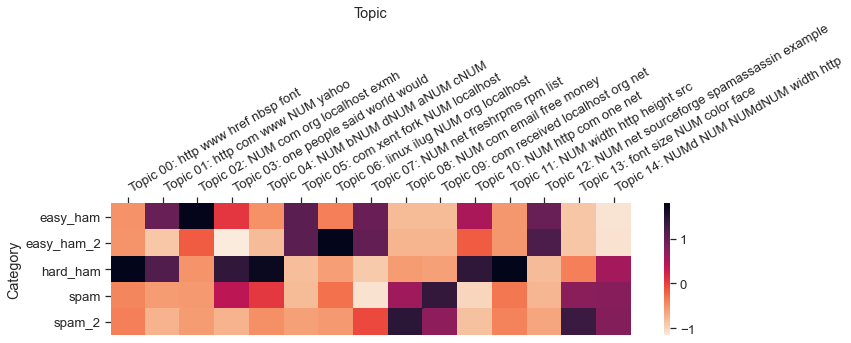

In [75]:
target_labels = ["easy_ham", "easy_ham_2", "hard_ham", "spam", "spam_2"]

lmw.plot_categories_by_topics_heatmap(directory,
                                      topic_distributions,
                                      topic_keys, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim=(12,5))

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


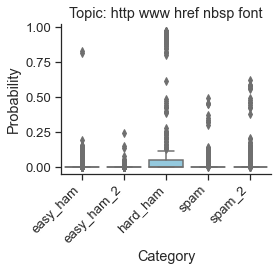

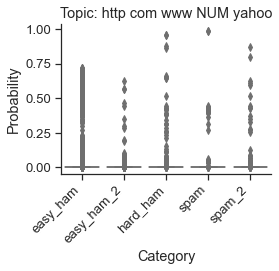

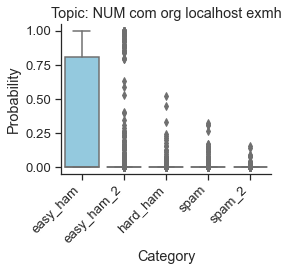

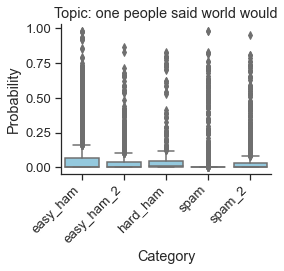

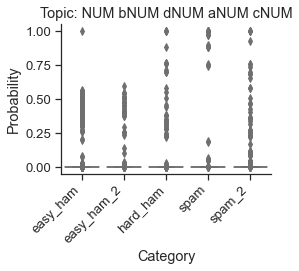

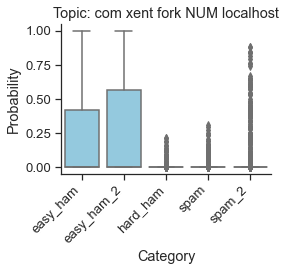

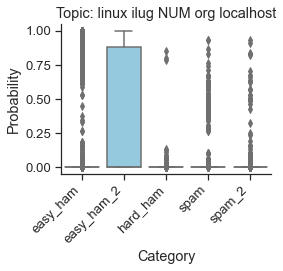

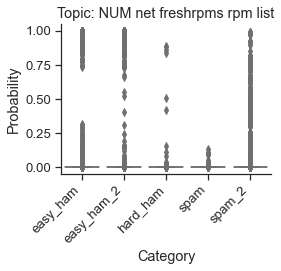

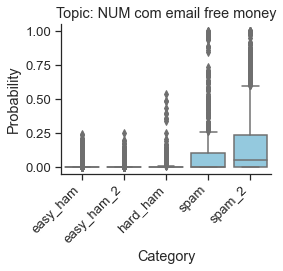

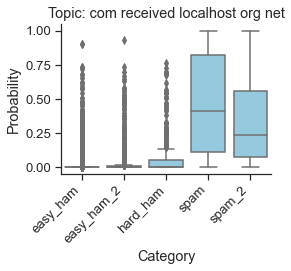

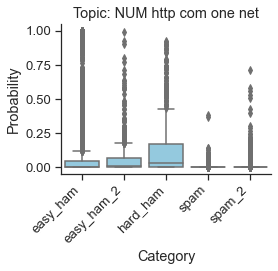

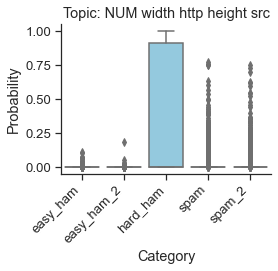

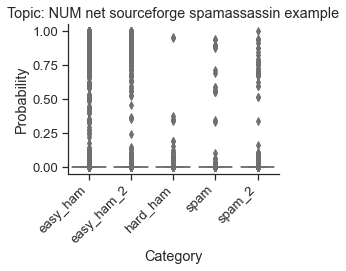

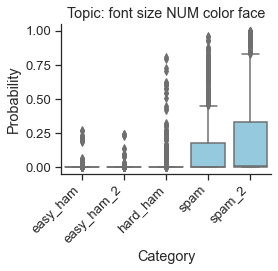

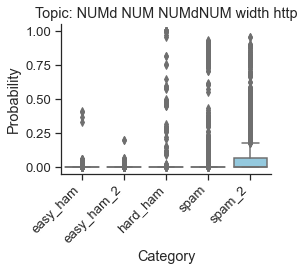

In [77]:
target_labels = ["easy_ham", "easy_ham_2", "hard_ham", "spam", "spam_2"]

for _topic_index in range(0, len(topic_keys)):
    
    lmw.plot_categories_by_topic_boxplots(directory,
                                          topic_distributions,
                                          topic_keys, 
                                          _topic_index,
                                          output_path=output_directory_path + '/boxplot.' + str(_topic_index) + '.pdf',
                                          target_labels=target_labels,
                                          dim=(4,4))